<a href="https://colab.research.google.com/github/adityachaudhary0/Heart-Disease-model/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd


In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'heart-disease-dataset' dataset.
Path to dataset files: /kaggle/input/heart-disease-dataset


In [14]:
df2=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [15]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

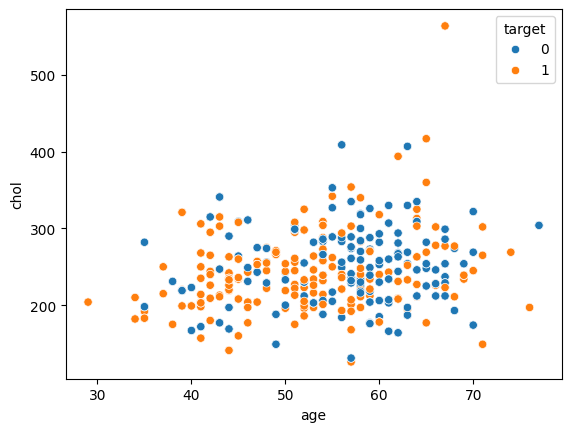

In [17]:
sns.scatterplot(data=df2,x="age",y="chol",hue='target')
plt.show()

In [18]:
#df2=df2.drop("thalach",axis=1)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt



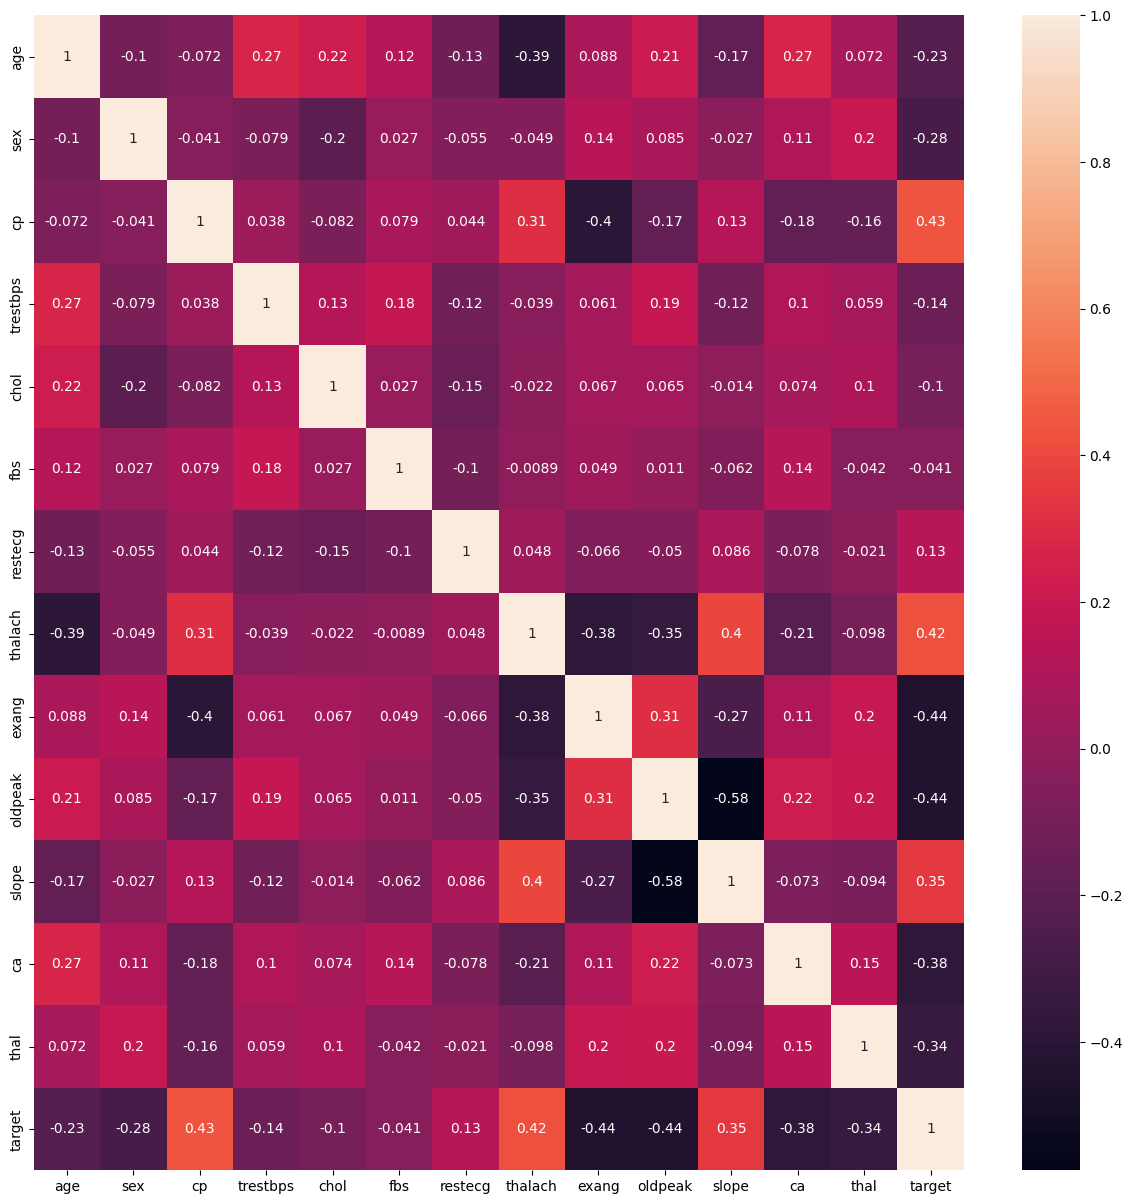

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(df2.corr(),annot=True)

plt.show()

In [21]:
X=df2.drop("target",axis=1)
y=df2["target"]

In [22]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [24]:
model = svm.SVC(
    kernel='rbf',   # linear, rbf, poly
    C=1.0           # penalty parameter
)

In [25]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.model_selection import cross_val_score
svm_scores = cross_val_score(model, X_train, y_train, cv=5)

print("Accuracy of svm is :", accuracy_score(y_test, y_pred))
print("Cross validation score of svm is :", svm_scores.mean())

Accuracy of svm is : 0.6829268292682927
Cross validation score of svm is : 0.6987804878048781


In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [28]:
p=lr.predict(X_test)
LR_ACC=accuracy_score(y_test,p)
lr_scores=cross_val_score(lr,X_train,y_train,cv=5)
print("Cross validation score of logistic regression is :",lr_scores.mean())
print("Accuracy of logistic regression is :", LR_ACC)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross validation score of logistic regression is : 0.8524390243902438
Accuracy of logistic regression is : 0.7951219512195122


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.linear_model import Perceptron
pm=Perceptron()
pm.fit(X_train,y_train)

Perceptron()

In [32]:
pred_per=pm.predict(X_test)
acc_per=accuracy_score(y_test,pred_per)
per_scores=cross_val_score(pm,X_train,y_train,cv=5)

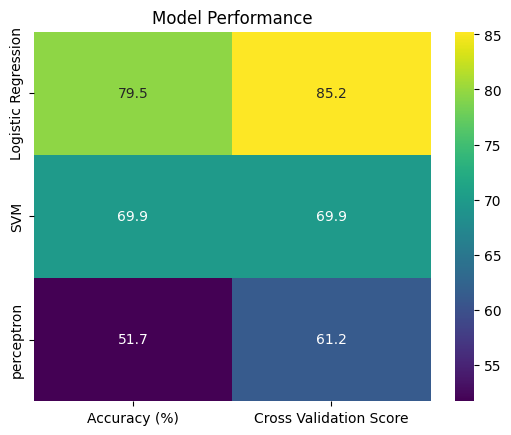

In [34]:
results={
    "Accuracy (%)":[LR_ACC*100,svm_scores.mean()*100,acc_per*100],
    "Cross Validation Score":[lr_scores.mean()*100,svm_scores.mean()*100,per_scores.mean()*100]
}
df_results=pd.DataFrame(results,index=["Logistic Regression","SVM","perceptron"])


sns.heatmap(df_results,annot=True,fmt=".1f",cmap="viridis")
plt.title("Model Performance")
plt.show()